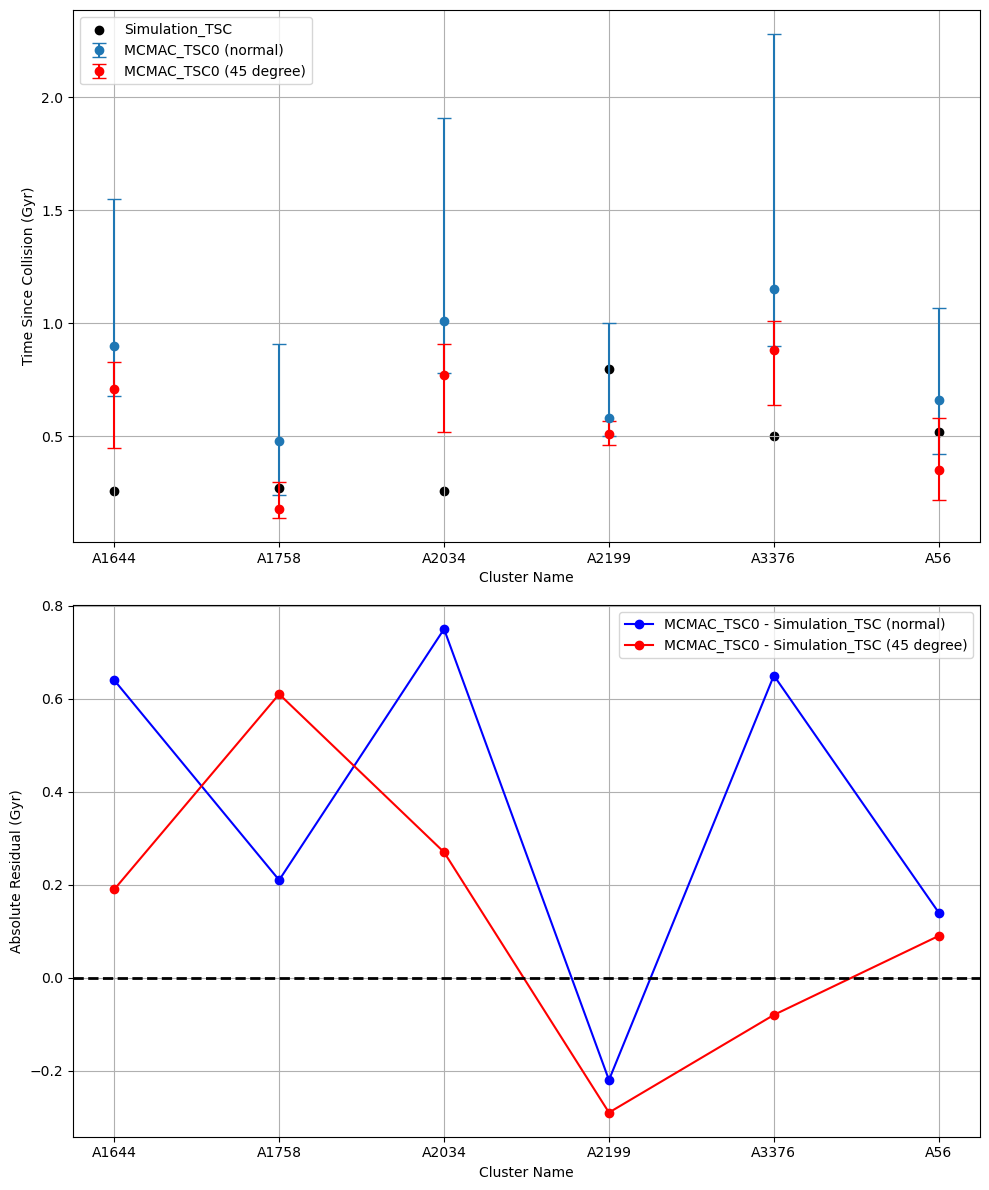

In [9]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# result_から始まる全てのcsvファイルを取得
csv_files = glob.glob("result_*.csv")
angle_45_files = [file for file in csv_files if "_0-45degree" in file]  # *_0_45degree.csv files
normal_files = [file for file in csv_files if "_0-45degree" not in file]  # other csv files

# CSVファイルを読み込み、DataFrameに結合
dataframes_normal = [pd.read_csv(file) for file in normal_files]
dataframes_angle_45 = [pd.read_csv(file) for file in angle_45_files]

df_normal = pd.concat(dataframes_normal, ignore_index=True)
df_angle_45 = pd.concat(dataframes_angle_45, ignore_index=True)

# ClusterNameでソート
df_normal = df_normal.sort_values("ClusterName")
df_angle_45 = df_angle_45.sort_values("ClusterName")

# プロットの作成
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# 最初のプロット（Time Since Collisionのエラーバー付きプロット）for normal files
ax1.errorbar(df_normal["ClusterName"], df_normal["MCMAC_TSC0"], 
             yerr=[abs(df_normal["MCMAC_TSC0"] - df_normal["MCMAC_TSC0.lower"]), 
                   abs(df_normal["MCMAC_TSC0.upper"] - df_normal["MCMAC_TSC0"])], 
             fmt='o', label="MCMAC_TSC0 (normal)", capsize=5)

# ax1.errorbar(df_normal["ClusterName"], df_normal["MCMAC_TSC1"], 
#              yerr=[abs(df_normal["MCMAC_TSC1"] - df_normal["MCMAC_TSC1.lower"]), 
#                    abs(df_normal["MCMAC_TSC1.upper"] - df_normal["MCMAC_TSC1"])], 
#              fmt='o', label="MCMAC_TSC1 (normal)", capsize=5)

# Simulation_TSC is plotted only for normal files
ax1.scatter(df_normal["ClusterName"], df_normal["Simulation_TSC"], marker='o', 
            label="Simulation_TSC", color='black')

# エラーバー付きプロット for angle_45 files (without Simulation_TSC)
ax1.errorbar(df_angle_45["ClusterName"], df_angle_45["MCMAC_TSC0"], 
             yerr=[abs(df_angle_45["MCMAC_TSC0"] - df_angle_45["MCMAC_TSC0.lower"]), 
                   abs(df_angle_45["MCMAC_TSC0.upper"] - df_angle_45["MCMAC_TSC0"])], 
             fmt='o', label="MCMAC_TSC0 (45 degree)", capsize=5, color='red')

# ax1.errorbar(df_angle_45["ClusterName"], df_angle_45["MCMAC_TSC1"], 
#              yerr=[abs(df_angle_45["MCMAC_TSC1"] - df_angle_45["MCMAC_TSC1.lower"]), 
#                    abs(df_angle_45["MCMAC_TSC1.upper"] - df_angle_45["MCMAC_TSC1"])], 
#              fmt='o', label="MCMAC_TSC1 (45 degree)", capsize=5, color='blue')

ax1.set_xlabel("Cluster Name")
ax1.set_ylabel("Time Since Collision (Gyr)")
ax1.legend()
ax1.grid(True)

# 2つ目のプロット（Absolute Residualのプロット）
residual_MCMAC_TSC0_normal = df_normal["MCMAC_TSC0"] - df_normal["Simulation_TSC"]
residual_MCMAC_TSC1_normal = df_normal["MCMAC_TSC1"] - df_normal["Simulation_TSC"]

residual_MCMAC_TSC0_angle_45 = df_angle_45["MCMAC_TSC0"] - df_normal["Simulation_TSC"]
residual_MCMAC_TSC1_angle_45 = df_angle_45["MCMAC_TSC1"] - df_normal["Simulation_TSC"]

# ClusterNameに基づく直線プロット for residuals (Normal)
ax2.plot(df_normal["ClusterName"], residual_MCMAC_TSC0_normal, 'o-', 
         label="MCMAC_TSC0 - Simulation_TSC (normal)", color='blue')

# ax2.plot(df_normal["ClusterName"], residual_MCMAC_TSC1_normal, 'o-', 
#          label="MCMAC_TSC1 - Simulation_TSC (normal)")

# ClusterNameに基づく直線プロット for residuals (45 degree)
ax2.plot(df_angle_45["ClusterName"], residual_MCMAC_TSC0_angle_45, 'o-', 
         label="MCMAC_TSC0 - Simulation_TSC (45 degree)", color='red')

# ax2.plot(df_angle_45["ClusterName"], residual_MCMAC_TSC1_angle_45, 'o-', 
#          label="MCMAC_TSC1 - Simulation_TSC (45 degree)", color='blue')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=2)


ax2.set_xlabel("Cluster Name")
ax2.set_ylabel("Absolute Residual (Gyr)")
ax2.legend()
ax2.grid(True)

# グラフを表示
plt.tight_layout()
plt.show()


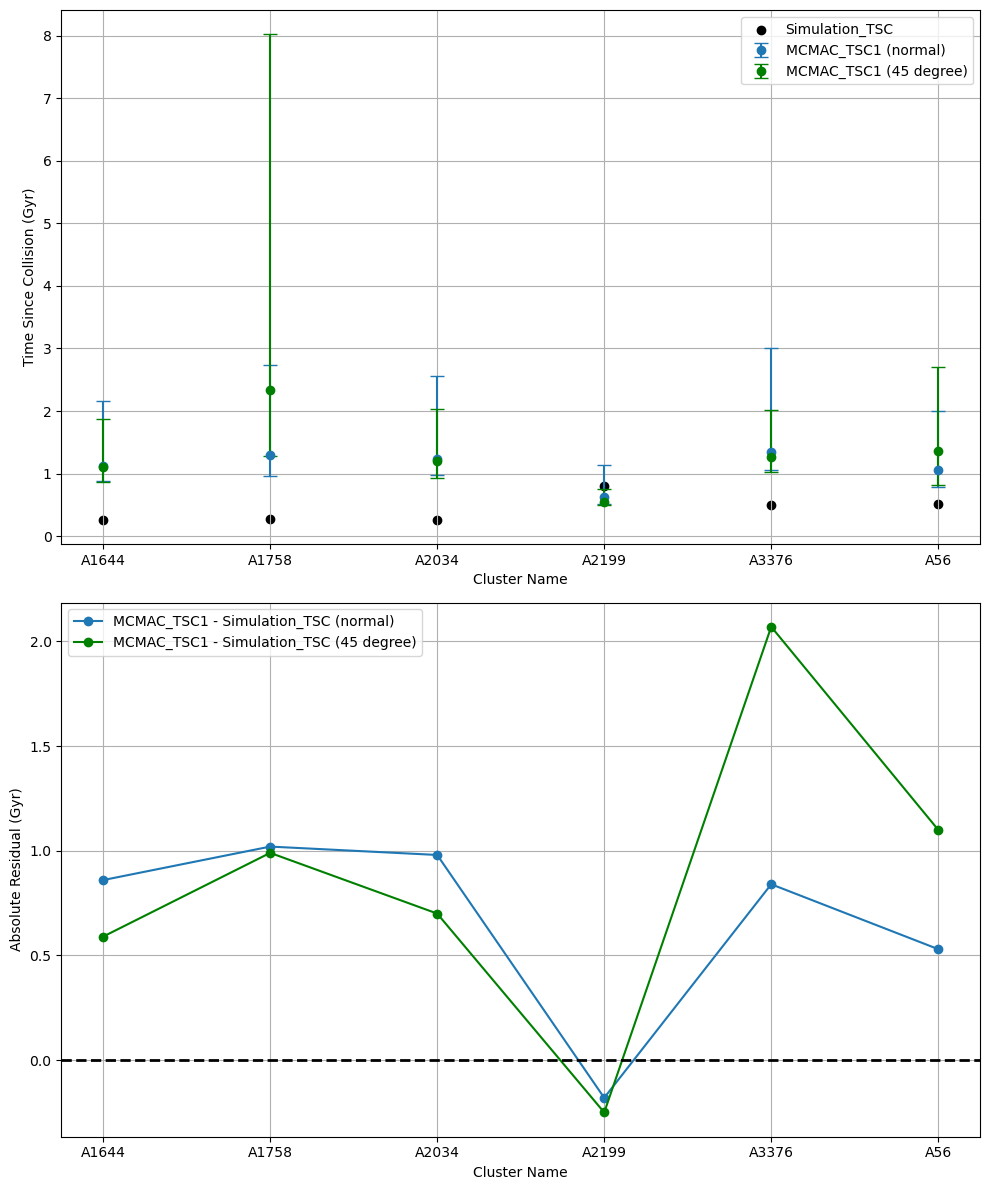

In [10]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# result_から始まる全てのcsvファイルを取得
csv_files = glob.glob("result_*.csv")
angle_45_files = [file for file in csv_files if "_0-45degree" in file]  # *_0_45degree.csv files
normal_files = [file for file in csv_files if "_0-45degree" not in file]  # other csv files

# CSVファイルを読み込み、DataFrameに結合
dataframes_normal = [pd.read_csv(file) for file in normal_files]
dataframes_angle_45 = [pd.read_csv(file) for file in angle_45_files]

df_normal = pd.concat(dataframes_normal, ignore_index=True)
df_angle_45 = pd.concat(dataframes_angle_45, ignore_index=True)

# ClusterNameでソート
df_normal = df_normal.sort_values("ClusterName")
df_angle_45 = df_angle_45.sort_values("ClusterName")

# プロットの作成
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# 最初のプロット（Time Since Collisionのエラーバー付きプロット）for normal files
# ax1.errorbar(df_normal["ClusterName"], df_normal["MCMAC_TSC0"], 
#              yerr=[abs(df_normal["MCMAC_TSC0"] - df_normal["MCMAC_TSC0.lower"]), 
#                    abs(df_normal["MCMAC_TSC0.upper"] - df_normal["MCMAC_TSC0"])], 
#              fmt='o', label="MCMAC_TSC0 (normal)", capsize=5)

ax1.errorbar(df_normal["ClusterName"], df_normal["MCMAC_TSC1"], 
             yerr=[abs(df_normal["MCMAC_TSC1"] - df_normal["MCMAC_TSC1.lower"]), 
                   abs(df_normal["MCMAC_TSC1.upper"] - df_normal["MCMAC_TSC1"])], 
             fmt='o', label="MCMAC_TSC1 (normal)", capsize=5)

# Simulation_TSC is plotted only for normal files
ax1.scatter(df_normal["ClusterName"], df_normal["Simulation_TSC"], marker='o', 
            label="Simulation_TSC", color='black')

# エラーバー付きプロット for angle_45 files (without Simulation_TSC)
# ax1.errorbar(df_angle_45["ClusterName"], df_angle_45["MCMAC_TSC0"], 
#              yerr=[abs(df_angle_45["MCMAC_TSC0"] - df_angle_45["MCMAC_TSC0.lower"]), 
#                    abs(df_angle_45["MCMAC_TSC0.upper"] - df_angle_45["MCMAC_TSC0"])], 
#              fmt='o', label="MCMAC_TSC0 (45 degree)", capsize=5, color='red')

ax1.errorbar(df_angle_45["ClusterName"], df_angle_45["MCMAC_TSC1"], 
             yerr=[abs(df_angle_45["MCMAC_TSC1"] - df_angle_45["MCMAC_TSC1.lower"]), 
                   abs(df_angle_45["MCMAC_TSC1.upper"] - df_angle_45["MCMAC_TSC1"])], 
             fmt='o', label="MCMAC_TSC1 (45 degree)", capsize=5, color='green')

ax1.set_xlabel("Cluster Name")
ax1.set_ylabel("Time Since Collision (Gyr)")
ax1.legend()
ax1.grid(True)

# 2つ目のプロット（Absolute Residualのプロット）
residual_MCMAC_TSC0_normal = df_normal["MCMAC_TSC0"] - df_normal["Simulation_TSC"]
residual_MCMAC_TSC1_normal = df_normal["MCMAC_TSC1"] - df_normal["Simulation_TSC"]

residual_MCMAC_TSC0_angle_45 = df_angle_45["MCMAC_TSC0"] - df_normal["Simulation_TSC"]
residual_MCMAC_TSC1_angle_45 = df_angle_45["MCMAC_TSC1"] - df_normal["Simulation_TSC"]

# ClusterNameに基づく直線プロット for residuals (Normal)
# ax2.plot(df_normal["ClusterName"], residual_MCMAC_TSC0_normal, 'o-', 
#          label="MCMAC_TSC0 - Simulation_TSC (normal)")

ax2.plot(df_normal["ClusterName"], residual_MCMAC_TSC1_normal, 'o-', 
         label="MCMAC_TSC1 - Simulation_TSC (normal)")

# ClusterNameに基づく直線プロット for residuals (45 degree)
# ax2.plot(df_angle_45["ClusterName"], residual_MCMAC_TSC0_angle_45, 'o-', 
#          label="MCMAC_TSC0 - Simulation_TSC (45 degree)", color='red')

ax2.plot(df_angle_45["ClusterName"], residual_MCMAC_TSC1_angle_45, 'o-', 
         label="MCMAC_TSC1 - Simulation_TSC (45 degree)", color='green')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=2)


ax2.set_xlabel("Cluster Name")
ax2.set_ylabel("Absolute Residual (Gyr)")
ax2.legend()
ax2.grid(True)

# グラフを表示
plt.tight_layout()
plt.show()
